<a href="https://colab.research.google.com/github/deepjyotisaha85/eva4/blob/master/session7/S7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 7'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
import datapreparation
import display
import dnn
import training
import evaluate

In [4]:
classes, trainloader, testloader = datapreparation.load()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


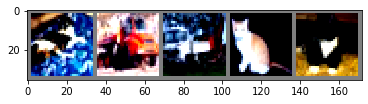

In [5]:
display.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,432
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7          [-1, 128, 32, 32]          73,728
              ReLU-8          [-1, 128, 32, 32]               0
       BatchNorm2d-9          [-1, 128, 32, 32]             256
           Conv2d-10           [-1, 32, 32, 32]           4,096
        MaxPool2d-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          18,432
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [9]:
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0024149417877197 Batch_id=390 Accuracy=52.34: 100%|██████████| 391/391 [00:17<00:00, 23.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 6064/10000 (60.64%)

EPOCH: 2


Loss=0.8909853100776672 Batch_id=390 Accuracy=69.81: 100%|██████████| 391/391 [00:18<00:00, 23.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7197/10000 (71.97%)

EPOCH: 3


Loss=0.7485161423683167 Batch_id=390 Accuracy=76.00: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7575/10000 (75.75%)

EPOCH: 4


Loss=0.6619826555252075 Batch_id=390 Accuracy=79.53: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7681/10000 (76.81%)

EPOCH: 5


Loss=0.44275838136672974 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [00:18<00:00, 20.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7817/10000 (78.17%)

EPOCH: 6


Loss=0.5293532013893127 Batch_id=390 Accuracy=84.04: 100%|██████████| 391/391 [00:18<00:00, 23.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7974/10000 (79.74%)

EPOCH: 7


Loss=0.4241057336330414 Batch_id=390 Accuracy=85.64: 100%|██████████| 391/391 [00:17<00:00, 23.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8082/10000 (80.82%)

EPOCH: 8


Loss=0.3345543444156647 Batch_id=390 Accuracy=87.28: 100%|██████████| 391/391 [00:18<00:00, 21.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7760/10000 (77.60%)

EPOCH: 9


Loss=0.4061953127384186 Batch_id=390 Accuracy=88.11: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7943/10000 (79.43%)

EPOCH: 10


Loss=0.42668524384498596 Batch_id=390 Accuracy=89.03: 100%|██████████| 391/391 [00:18<00:00, 23.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7947/10000 (79.47%)

EPOCH: 11


Loss=0.2358514368534088 Batch_id=390 Accuracy=89.96: 100%|██████████| 391/391 [00:18<00:00, 22.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8068/10000 (80.68%)

EPOCH: 12


Loss=0.30238592624664307 Batch_id=390 Accuracy=91.09: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8048/10000 (80.48%)

EPOCH: 13


Loss=0.20340752601623535 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7872/10000 (78.72%)

EPOCH: 14


Loss=0.32963827252388 Batch_id=390 Accuracy=91.94: 100%|██████████| 391/391 [00:18<00:00, 23.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8044/10000 (80.44%)

EPOCH: 15


Loss=0.17948712408542633 Batch_id=390 Accuracy=92.35: 100%|██████████| 391/391 [00:18<00:00, 22.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7982/10000 (79.82%)

EPOCH: 16


Loss=0.1835545152425766 Batch_id=390 Accuracy=92.68: 100%|██████████| 391/391 [00:18<00:00, 22.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8091/10000 (80.91%)

EPOCH: 17


Loss=0.2683565020561218 Batch_id=390 Accuracy=93.60: 100%|██████████| 391/391 [00:18<00:00, 20.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7967/10000 (79.67%)

EPOCH: 18


Loss=0.12497015297412872 Batch_id=390 Accuracy=93.58: 100%|██████████| 391/391 [00:18<00:00, 21.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8078/10000 (80.78%)

EPOCH: 19


Loss=0.21108779311180115 Batch_id=390 Accuracy=94.40: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7983/10000 (79.83%)

EPOCH: 20


Loss=0.13114219903945923 Batch_id=390 Accuracy=94.47: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.0056, Accuracy: 8098/10000 (80.98%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    car  ship  bird horse  ship
Predicted:    car  ship  bird horse  ship


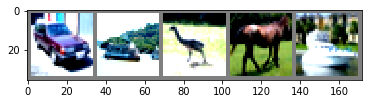

In [10]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [11]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 81 %


In [12]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 80 %
Accuracy of   car : 94 %
Accuracy of  bird : 68 %
Accuracy of   cat : 60 %
Accuracy of  deer : 70 %
Accuracy of   dog : 83 %
Accuracy of  frog : 86 %
Accuracy of horse : 84 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %
